In [2]:
# Loading all the needed Packages
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Import classes from Class.py
from Data_handling import *
from Class import *
from Class_no_zone import *

In [2]:
## DATA INDEX

#Data_df

In [3]:
## PARAMETERS DEFINITION

# Time
H = 24          # Hours in a day
D = 5           # Typical days in a year
Y = 30          # Years of the investment timeline
N = H*D*Y       # Number of hours in the investment timeline    


# Number of loads and generators
N_dem = len(Dem[0,:])       # Number of loads
N_gen_E = len(Gen_E_OpCost)   # Number of existing generators
N_gen_N = len(Gen_N_OpCost)   # Number of new generators
N_zone = len(Trans_Z_Connected_To_Z)     # Number of zones
N_line = len(Trans_Line_From_Z)   # Number of transmission lines


# Hyperparameters
B = 3000000000   # Budget for the investment problem
R = 73 # Conversion rate


In [4]:
 ## CREATE THE PARAMETERS AND DATA OBJECTS
ParametersObj_SHORT = Parameters(H, D, Y, 10, N_dem, N_gen_E, N_gen_N, N_zone, N_line, B, R, N_S, N_S_test, max_deviation)
DataObj_SHORT = InputData(Dem[0:10,:], Uti, Load_Z, Gen_E_OpCost, Gen_N_OpCost, Gen_N_MaxInvCap, Gen_E_Cap, Gen_N_InvCost, Gen_E_Tech, Gen_N_Tech, Gen_E_Z, Gen_N_Z, Gen_E_OpCap[0:10,:], Gen_N_OpCap[0:10,:], Trans_React, Trans_Cap, Trans_Line_From_Z, Trans_Line_To_Z, Trans_Z_Connected_To_Z,Gen_N_Data_scenarios,Gen_N_OpCost_scenarios, Gen_N_Data_scenarios_train, Gen_N_OpCost_scenarios_train, Gen_N_Data_scenarios_test, Gen_N_OpCost_scenarios_test)

In [4]:
## CREATE THE PARAMETERS AND DATA OBJECTS
ParametersObj = Parameters(H, D, Y, N, N_dem, N_gen_E, N_gen_N, N_zone, N_line, B, R, N_S, N_S_test, max_deviation)
DataObj = InputData(Dem, Uti, Load_Z, Gen_E_OpCost, Gen_N_OpCost, Gen_N_MaxInvCap, Gen_E_Cap, Gen_N_InvCost, Gen_E_Tech, Gen_N_Tech, Gen_E_Z, Gen_N_Z, Gen_E_OpCap, Gen_N_OpCap, Trans_React, Trans_Cap, Trans_Line_From_Z, Trans_Line_To_Z, Trans_Z_Connected_To_Z,Gen_N_Data_scenarios,Gen_N_OpCost_scenarios, Gen_N_Data_scenarios_train, Gen_N_OpCost_scenarios_train, Gen_N_Data_scenarios_test, Gen_N_OpCost_scenarios_test)

# Model 1: Sequential optimization of Dispatch problem and Investment problem

### 1) Market Clearing

In [5]:
# Run the Market Clearing Problem
MarketClearing1 = MarketClearingModel1(ParametersObj, DataObj)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-07
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 140400 rows, 126000 columns and 270000 nonzeros
Model fingerprint: 0x7cd15d6a
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [3e+01, 1e+03]
  Bounds range     [1e+03, 1e+03]
  RHS range        [4e-01, 1e+04]
Presolve removed 137468 rows and 105572 columns
Presolve time: 0.34s
Presolved: 2932 rows, 20428 columns, 20428 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 2.932e+03 (roughly 10 MB of memory)
 Factor Ops : 2.932e+03 (less than 1 second per iteration)
 Threads    : 1

   

### 2) Investment Problem

In [7]:
# # Run the investmentmodel
# InvestmentPB1 = InvestmentModel1(ParametersObj, DataObj, MarketClearing1.res.DA_price)

In [8]:
# InvestmentPB1.res.df

### 3) Stochastic robust investment problem

In [9]:
  
# # Class for the robust stochastic model
# class InvestmentModel_Robust1():
#     def __init__(self, Parameters, Data, DA_Price, Model_results = 1, Guroby_results = 1):
#         self.D = Data  # Data
#         self.P = Parameters  # Parameters
#         self.DA_Price = DA_Price  # Day-ahead price
#         self.Model_results = Model_results  # Display results
#         self.Guroby_results = Guroby_results  # Display guroby results
#         self.var = Expando()  # Variables
#         self.con = Expando()  # Constraints
#         self.res = Expando()  # Results
#         self._build_model() 


#     def _build_variables(self):
#         self.var.P_N = self.m.addMVar((self.P.N_gen_N), lb=0) # Invested capacity in every new generator
#         self.var.p_N = self.m.addMVar((self.P.N, self.P.N_gen_N, self.P.N_S), lb=0) # Power output per hour for every new generator


#     def _build_constraints(self):
#         # Capacity investment constraint
#         self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Maximum capacity investment')

#         # Max production constraint
#         for s in range(self.P.N_S):
#             self.con.max_p_N = self.m.addConstr(self.var.p_N[:,:,s] <= self.D.Gen_N_OpCap * self.var.P_N, name='Maximum RES production') 

#         # Budget constraint
#         for s in range(self.P.N_S):
#             self.con.budget = self.m.addConstr(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] <= self.P.B, name='Budget constraint')


#     def _build_objective(self):
#         revenues = (gp.quicksum((self.var.p_N[:,:,s] @ self.D.Gen_N_Z.T for s in range(self.P.N_S))) *  self.DA_Price).sum()
#         op_costs = (gp.quicksum(self.var.p_N[:,:,s] @ self.D.Gen_N_OpCost_scenarios[:,s] for s in range(self.P.N_S))).sum()
#         invest_costs = gp.quicksum(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] for s in range(self.P.N_S))
#         objective = (1/self.P.N_S) * (self.P.R*(revenues - op_costs) - invest_costs)
#         self.m.setObjective(objective, GRB.MAXIMIZE)


#     def _display_guropby_results(self):
#         self.m.setParam('OutputFlag', self.Guroby_results)
    

#     def _build_model(self):
#         self.m = gp.Model('Investment problem')
#         self._build_variables()  
#         self._build_constraints()
#         self._build_objective()
#         #self._display_guropby_results()
#         self.m.optimize()
#         if self.Model_results == 1:
#             self._extract_results()

#     def _extract_results(self):
#         # Display the objective value
#         print('Objective value: ', self.m.objVal)
        
#         # Display the generators the model invested in, in a dataframe
#         self.res.P_N = self.var.P_N.X
#         self.res.P_N = self.res.P_N.reshape((self.P.N_gen_N,1))
#         self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns = ['Technology'])
#         self.res.df['Invested capacity (MW)'] = self.res.P_N    

#         # Display the objective value of each scenario and save it in a list
#         self.res.objective_values = []
#         for s in range(self.P.N_S):
#             revenues = (self.var.p_N[:,:,s].X @ self.D.Gen_N_Z.T * self.DA_Price).sum()
#             op_costs = (self.var.p_N[:,:,s].X @ self.D.Gen_N_OpCost_scenarios[:,s]).sum()
#             invest_costs = (self.var.P_N.X @ self.D.Gen_N_Data_scenarios[:,s]).sum()
#             objective = self.P.R*(revenues - op_costs) - invest_costs
#             self.res.objective_values.append(objective)
#             #print('Objective value for scenario ', s, ': ', objective)

In [10]:
# #Run the stochastic investment model (without scenario dependent variables)
# Investment_Robust = InvestmentModel_Robust1(ParametersObj, DataObj, MarketClearing1.res.DA_price)

In [11]:
# Investment_Robust.res.df

### 3) Chance Constraint

In [12]:
# class InvestmentModel_Stochastic_ChanceConstraint1():
#     def __init__(self, Parameters, Data, DA_Price, epsilon = 0.1, Model_results = 1, Guroby_results = 1):
#         self.D = Data  # Data
#         self.P = Parameters  # Parameters
#         self.DA_Price = DA_Price  # Day-ahead price
#         self.epsilon = epsilon  # Chance constraint
#         self.Model_results = Model_results  # Display results
#         self.Guroby_results = Guroby_results  # Display guroby results
#         self.var = Expando()  # Variables
#         self.con = Expando()  # Constraints
#         self.res = Expando()  # Results
#         self._build_model() 


#     def _build_variables(self):
#         self.var.P_N = self.m.addMVar((self.P.N_gen_N), lb=0) # Invested capacity in every new generator
#         self.var.p_N = self.m.addMVar((self.P.N, self.P.N_gen_N, self.P.N_S), lb=0) # Power output per hour for every new generator
#         self.var.u = self.m.addMVar((self.P.N_S), vtype=GRB.BINARY) # Binary variable for each scenario

#     def _build_constraints(self):
#         # Capacity investment constraint
#         self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Maximum capacity investment')

#         # Max production constraint
#         for s in range(self.P.N_S):
#             self.con.max_p_N = self.m.addConstr(self.var.p_N[:,:,s] <= self.D.Gen_N_OpCap * self.var.P_N, name='Maximum RES production') 

#         # Budget constraint
#         for s in range(self.P.N_S):
#             self.con.budget = self.m.addConstr(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] - self.P.B <= (1-self.var.u[s])*self.P.Big_M, name='Budget constraint')

#          # Chance constraint
#         self.con.chance = self.m.addConstr( (self.var.u).sum() /self.P.N_S >= (1-self.epsilon), name='Chance constraint')


#     def _build_objective(self):
#         revenues = (gp.quicksum((self.var.p_N[:,:,s] @ self.D.Gen_N_Z.T for s in range(self.P.N_S))) *  self.DA_Price).sum()
#         op_costs = (gp.quicksum(self.var.p_N[:,:,s] @ self.D.Gen_N_OpCost_scenarios[:,s] for s in range(self.P.N_S))).sum()
#         invest_costs = gp.quicksum(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] for s in range(self.P.N_S))
#         objective = (1/self.P.N_S) * (self.P.R*(revenues - op_costs) - invest_costs)

#         self.m.setObjective(objective, GRB.MAXIMIZE)


#     def _display_guropby_results(self):
#         self.m.setParam('OutputFlag', self.Guroby_results)
    

#     def _build_model(self):
#         self.m = gp.Model('Investment problem')
#         self._build_variables()  
#         self._build_constraints()
#         self._build_objective()
#         #self._display_guropby_results()
#         self.m.optimize()
#         if self.Model_results == 1:
#             self._extract_results()

#     def _extract_results(self):
#         # Display the objective value
#         print('Objective value: ', self.m.objVal)
        
#         # Display the generators the model invested in, in a dataframe
#         self.res.P_N = self.var.P_N.X
#         self.res.P_N = self.res.P_N.reshape((self.P.N_gen_N,1))
#         self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns = ['Technology'])
#         self.res.df['Invested capacity (MW)'] = self.res.P_N  

#         # Display the objective value of each scenario and save it in a list
#         self.res.objective_values = []
#         self.res.violated_budget = []
#         for s in range(self.P.N_S):
#             revenues = (self.var.p_N[:,:,s].X @ self.D.Gen_N_Z.T * self.DA_Price).sum()
#             op_costs = (self.var.p_N[:,:,s].X @ self.D.Gen_N_OpCost_scenarios[:,s]).sum()
#             invest_costs = (self.var.P_N.X @ self.D.Gen_N_Data_scenarios[:,s]).sum()
#             objective = self.P.R*(revenues - op_costs) - invest_costs
#             self.res.objective_values.append(objective)
#             self.res.violated_budget.append(self.var.u[s].X)
#             #print('Objective value for scenario ', s, ': ', objective)

      



In [13]:
# Investment_Stochastic_ChanceConstraint = InvestmentModel_Stochastic_ChanceConstraint1(ParametersObj, DataObj, MarketClearing1.res.DA_price, epsilon = 0.8)

### 4) CVaR Model

In [14]:
  
# # Class for the robust stochastic model
# class InvestmentModel_CVaR():
#     def __init__(self, Parameters, Data, DA_Price, Beta = 0.5, Alpha = 0.95, Model_results = 1, Guroby_results = 1):
#         self.D = Data  # Data
#         self.P = Parameters  # Parameters
#         self.DA_Price = DA_Price  # Day-ahead price
#         self.beta = Beta
#         self.alpha = Alpha
#         self.Model_results = Model_results  # Display results
#         self.Guroby_results = Guroby_results  # Display guroby results
#         self.var = Expando()  # Variables
#         self.con = Expando()  # Constraints
#         self.res = Expando()  # Results
#         self._build_model() 


#     def _build_variables(self):
#         self.var.P_N = self.m.addMVar((self.P.N_gen_N), lb=0) # Invested capacity in every new generator
#         self.var.p_N = self.m.addMVar((self.P.N, self.P.N_gen_N, self.P.N_S), lb=0) # Power output per hour for every new generator
#         self.var.eta = self.m.addMVar((self.P.N_S), lb=0,ub=GRB.INFINITY)# Eta for each scenario
#         self.var.zeta = self.m.addMVar((1), lb=-GRB.INFINITY, ub=GRB.INFINITY) # Zeta for the VaR

#     def _build_constraints(self):
#         # Capacity investment constraint
#         self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Maximum capacity investment')

#         # Max production constraint
#         for s in range(self.P.N_S):
#             self.con.max_p_N = self.m.addConstr(self.var.p_N[:,:,s] <= self.D.Gen_N_OpCap * self.var.P_N, name='Maximum RES production') 

#         # Budget constraint
#         for s in range(self.P.N_S):
#             self.con.budget = self.m.addConstr(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] <= self.P.B, name='Budget constraint')

#         # CVaR constraint
#         for s in range(self.P.N_S):
#             self.con.CVaR = self.m.addConstr(self.var.eta[s] >= self.var.zeta 
#                 -self.P.R*((self.var.p_N[:,:,s] @ self.D.Gen_N_Z.T) *  self.DA_Price).sum() # revenues
#             +   self.P.R*gp.quicksum((self.var.p_N[:,:,s] @ self.D.Gen_N_OpCost_scenarios[:,s])) # operational costs
#             +   self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] # investment costs
#             , name='CVaR constraint')

#     def _build_objective(self):
#         revenues = (gp.quicksum((self.var.p_N[:,:,s] @ self.D.Gen_N_Z.T for s in range(self.P.N_S))) *  self.DA_Price).sum()
#         op_costs = (gp.quicksum(self.var.p_N[:,:,s] @ self.D.Gen_N_OpCost_scenarios[:,s] for s in range(self.P.N_S))).sum()
#         invest_costs = gp.quicksum(self.var.P_N @ self.D.Gen_N_Data_scenarios[:,s] for s in range(self.P.N_S))
#         self.CVaR = self.var.zeta - (1/(1-self.alpha)) * gp.quicksum(self.var.eta[s] * (1/self.P.N_S) for s in range(self.P.N_S))
#         self.expected_result = (1/self.P.N_S)*(self.P.R*(revenues - op_costs) - invest_costs)
#         objective = (1-self.beta)*self.expected_result + self.beta*self.CVaR
#         self.m.setObjective(objective, GRB.MAXIMIZE)


#     def _display_guropby_results(self):
#         self.m.setParam('OutputFlag', self.Guroby_results)
    

#     def _build_model(self):
#         self.m = gp.Model('Investment problem')
#         self._build_variables()  
#         self._build_constraints()
#         self._build_objective()
#         self.m.setParam('Presolve', 2) # Aggressive presolve
#         #self._display_guropby_results()
#         self.m.optimize()
#         if self.Model_results == 1:
#             self._extract_results()

#     def _extract_results(self):
#         # Display the objective value
#         print('Objective value: ', self.m.objVal)
#         #display the CVaR
#         print('CVaR: ', self.CVaR.getValue())
#         #Display zeta
#         print('Zeta: ', self.var.zeta.X)
#         #Display eta
#         print('Eta: ', self.var.eta.X)
        
#         # Display the generators the model invested in, in a dataframe
#         self.res.P_N = self.var.P_N.X
#         self.res.P_N = self.res.P_N.reshape((self.P.N_gen_N,1))
#         self.res.CVaR = self.CVaR.getValue()
#         self.res.Zeta = self.var.zeta.X
#         self.res.Expected_Result = self.expected_result.getValue()
#         self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns = ['Technology'])
#         self.res.df['Invested capacity (MW)'] = self.res.P_N 

#         # Display the objective value of each scenario and save it in a list
#         self.res.objective_values = []
#         for s in range(self.P.N_S):
#             revenues = (self.var.p_N[:,:,s].X @ self.D.Gen_N_Z.T * self.DA_Price).sum()
#             op_costs = (self.var.p_N[:,:,s].X @ self.D.Gen_N_OpCost_scenarios[:,s]).sum()
#             invest_costs = (self.var.P_N.X @ self.D.Gen_N_Data_scenarios[:,s]).sum()
#             objective = self.P.R*(revenues - op_costs) - invest_costs
#             self.res.objective_values.append(objective)
#             #print('Objective value for scenario ', s, ': ', objective)
             

In [15]:
# Investment_CVaR = InvestmentModel_CVaR(ParametersObj, DataObj, MarketClearing1.res.DA_price, Beta = 0.5, Alpha = 0.95)

In [16]:
# Investment_CVaR.res.df

## Test & Train models

In [7]:
class Test_and_Train_model():
    def __init__(self, Parameters, Data, DA_Price, Mode = 'Robust', Type = 'Train', Targets = np.ones((N_gen_N,1)) ,epsilon = 0.1, Beta=0.5, Alpha=0.95, Model_results=True, Guroby_results=False):
        self.D = Data  # Data
        self.P = Parameters  # Parameters
        # self.DA_Price_reduced = DA_Price  # Day-ahead price
        self.Mode = Mode
        self.Type = Type
        self.Targets = Targets
        self.epsilon = epsilon
        self.beta = Beta
        self.alpha = Alpha
        self.Model_results = Model_results  # Display results
        self.Guroby_results = Guroby_results  # Display Gurobi results
        self.var = Expando()  # Variables
        self.con = Expando()  # Constraints
        self.res = Expando()  # Results

        # Reduce the computationnal time
        self.P.N_reduced = self.P.N // 30 # Number of hours in 1 year
        self.D.Gen_N_OpCap_reduced = self.D.Gen_N_OpCap[0:120] # Gen_N_OpCap for 1 year
        self.P.R_year = self.P.R * 30 # Conversion rate for 1 year
        self.DA_Price_reduced = DA_Price[0:120] # DA_Price for 1 year
        if self.Type == 'Train':
            self.N_S = N_S_train
            self.OPEX_Cost = self.D.Gen_N_OpCost_scenarios_train
            self.CAPEX_Cost = self.D.Gen_N_Data_scenarios_train
        if self.Type == 'Test':
            self.N_S = N_S_test
            self.OPEX_Cost = self.D.Gen_N_OpCost_scenarios_test
            self.CAPEX_Cost = self.D.Gen_N_Data_scenarios_test
        if self.Type == 'Train' and self.Mode == 'Deterministic':
            self.N_S = 1
            self.OPEX_Cost = self.D.Gen_N_OpCost_scenarios_train.mean(axis=1).reshape((self.P.N_gen_N,1))
            self.CAPEX_Cost = self.D.Gen_N_Data_scenarios_train.mean(axis=1).reshape((self.P.N_gen_N,1))
            
        self._build_model()
        

    def _build_variables(self):
        self.var.P_N = self.m.addMVar((self.P.N_gen_N), lb=0, name="Invested_Capacity")  
        self.var.p_N = self.m.addMVar((self.P.N_reduced, self.P.N_gen_N, self.N_S), lb=0, name="Power_Output") 

        if self.Mode == 'Chance':
            self.var.u = self.m.addMVar((self.N_S), vtype=GRB.BINARY) # Binary variable for each scenario

        if self.Mode == 'CVaR' and self.Type == 'Train':
            self.var.eta = self.m.addMVar((self.N_S), lb=0, name="Eta")  
            self.var.zeta = self.m.addVar(lb=-GRB.INFINITY, name="Zeta")  

    def _build_constraints(self):
        # Capacity investment constraint
        self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Max_Investment_Capacity')
        
        # Max production constraints for all scenarios
        self.con.max_p_N = self.m.addConstrs(
            (self.var.p_N[:, :, s] <= self.D.Gen_N_OpCap_reduced * self.var.P_N for s in range(self.N_S)), name="Max_Production")
        
        # Budget constraint 
        if self.Mode == 'Robust' or self.Mode == 'CVaR' or self.Mode == 'Deterministic':
            if self.Type == 'Train':
                for s in range(self.N_S):
                    self.con.budget = self.m.addConstr(self.var.P_N @ self.CAPEX_Cost[:,s] <= self.P.B_test_train, name='Budget constraint')
        
        if self.Mode == 'Chance':
            if self.Type == 'Test':
                self.epsilon = 1
            if self.Type == 'Train':
                for s in range(self.N_S):
                    self.con.budget = self.m.addConstr(self.var.P_N @ self.CAPEX_Cost[:,s] - self.P.B_test_train <= (1-self.var.u[s])*self.P.Big_M, name='Budget constraint')
                self.con.chance = self.m.addConstr( (self.var.u).sum() /self.N_S >= (1-self.epsilon), name='Chance constraint')
                
        if self.Mode == 'CVaR' and self.Type == 'Train':
            # CVaR constraints 
            for s in range(self.N_S):
                revenues = (self.var.p_N[:, :, s] @ self.D.Gen_N_Z.T * self.DA_Price_reduced).sum()
                op_costs = (self.var.p_N[:, :, s] @ self.OPEX_Cost[:, s]).sum()
                invest_costs = self.var.P_N @ self.CAPEX_Cost[:, s]
                remaining_budget = self.P.B_test_train -self.var.P_N @ self.CAPEX_Cost.mean(axis=1) 
                
                self.con.CVaR = self.m.addConstr(
                    self.var.eta[s] >= self.var.zeta - (self.P.R_year * (revenues - op_costs) + remaining_budget),
                    name=f"CVaR_{s}")
        
        if self.Type == 'Train':
            self.con.targets = self.m.addConstr(self.var.P_N == self.Targets, name='Targets')
            
            
    def _build_objective(self):
        # Calculate components of the objective
        revenues = sum((self.var.p_N[:, :, s] @ self.D.Gen_N_Z.T * self.DA_Price_reduced).sum() for s in range(self.N_S))
        op_costs = sum((self.var.p_N[:, :, s] @ self.OPEX_Cost[:, s]).sum() for s in range(self.N_S))
        invest_costs = self.var.P_N @ self.CAPEX_Cost.mean(axis=1)  # Average costs
        remaining_budget = self.P.B_test_train -self.var.P_N @ self.CAPEX_Cost.mean(axis=1) 
        
        if self.Mode == 'CVaR' and self.Type == 'Train':
            self.CVaR = self.var.zeta - (1 / (1 - self.alpha)) * gp.quicksum(self.var.eta[s] / self.N_S for s in range(self.N_S))
            self.expected_result = (1 / self.N_S) * (self.P.R_year * (revenues - op_costs) + remaining_budget) 
            objective = (1 - self.beta) * self.expected_result + self.beta * self.CVaR

        else:
            objective = self.P.R_year * (revenues - op_costs) + remaining_budget


        self.m.setObjective(objective, GRB.MAXIMIZE)

    def _set_solver_parameters(self):
        self.m.setParam('Presolve', 2)  # Moderate presolve to speed up model setup
        self.m.setParam('Threads', 4)  # Use 4 threads (adjust for your system)

    def _build_model(self):
        self.m = gp.Model('Optimized_Investment_Model')
        self._build_variables()
        self._build_constraints()
        self._build_objective()
        self._set_solver_parameters()
        self.m.optimize()
        if self.Model_results:
            self._extract_results()

    def _extract_results(self):
        print(f'Objective Value: {self.m.objVal}')

        if self.Mode == 'CVaR' and self.Type == 'Train':
            self.res.CVaR = self.CVaR.getValue()
            self.res.Expected_Result = self.expected_result.getValue()
        
        self.res.P_N = self.var.P_N.X
        self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns=['Technology'])
        self.res.df['Invested Capacity (MW)'] = self.res.P_N
        self.res.rem_budget = self.P.B_test_train - (self.var.P_N.X @ self.CAPEX_Cost.mean(axis=1)).sum()

        if self.Mode == 'Deterministic' and self.Type == 'Train':
            self.res.CAPEX_Cost = self.CAPEX_Cost
            self.res.OPEX_Cost = self.OPEX_Cost

        #Assumed Budget
        self.res.budget = self.P.B_test_train 

        #Assumed demand and generation
        self.res.Demand = self.D.Dem
        self.res.Generation = self.D.Gen_N_OpCap

        self.res.objective_values = []
        self.res.violated_budget = []
        for s in range(self.N_S):
            revenues = (self.var.p_N[:, :, s].X @ self.D.Gen_N_Z.T * self.DA_Price_reduced).sum()
            op_costs = (self.var.p_N[:, :, s].X @ self.OPEX_Cost[:, s]).sum()
            invest_costs = (self.var.P_N.X @ self.CAPEX_Cost[:, s]).sum()
            remaining_budget = self.P.B_test_train - (self.var.P_N.X @ self.CAPEX_Cost[:, s]).sum()
            if remaining_budget < 0:
                self.res.violated_budget.append(1)
            if remaining_budget >= 0:
                self.res.violated_budget.append(0)
            objective = (self.P.R_year * (revenues - op_costs) + remaining_budget)/1000000000
            self.res.objective_values.append(objective)
            self.res.standard_deviation = np.std(self.res.objective_values)
        
       
        


In [16]:
BilevelInvestment = np.array([304.5,0,0,0,0,340,400,114.3,0,0,0,0,152.1,400,0,67.7])

In [17]:
BilevelInvestment

array([304.5,   0. ,   0. ,   0. ,   0. , 340. , 400. , 114.3,   0. ,
         0. ,   0. ,   0. , 152.1, 400. ,   0. ,  67.7])

In [18]:
# Run the Test_and_Train_model for Robust, Chance and CVaR, for train and test sets, and store the results in lists
#Train_Robust = Test_and_Train_model(ParametersObj, DataObj, MarketClearing1.res.DA_price, Mode='Robust')
# Train_Chance = Test_and_Train_model(ParametersObj, DataObj, MarketClearing1.res.DA_price, Mode='Chance', epsilon=0.2)
# Train_CVaR = Test_and_Train_model(ParametersObj, DataObj, MarketClearing1.res.DA_price, Mode='CVaR', Beta=0.5, Alpha=0.95)
Train_Deterministic = Test_and_Train_model(ParametersObj, DataObj, MarketClearing1.res.DA_price, Mode='Deterministic',Type='Train', Targets=BilevelInvestment )
# Test_Robust = Test_and_Train_model(ParametersObj, DataObj, MarketClearing1.res.DA_price, Mode='Robust', Type='Test', Targets=Train_Robust.res.P_N)
# Test_Chance = Test_and_Train_model(ParametersObj, DataObj, MarketClearing1.res.DA_price, Mode='Chance', Type='Test', Targets=Train_Chance.res.P_N, epsilon=1)
# Test_CVaR = Test_and_Train_model(ParametersObj, DataObj, MarketClearing1.res.DA_price, Mode='CVaR', Type='Test', Targets=Train_CVaR.res.P_N)
# Test_Deterministic = Test_and_Train_model(ParametersObj, DataObj, MarketClearing1.res.DA_price, Mode='Deterministic', Type='Test', Targets=Train_Deterministic.res.P_N)

Set parameter Presolve to value 2
Set parameter Threads to value 4
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 4 threads

Optimize a model with 2193 rows, 1936 columns and 4010 nonzeros
Model fingerprint: 0x2463dbe4
Coefficient statistics:
  Matrix range     [4e-04, 1e+06]
  Objective range  [3e+04, 1e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+01, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 2193 rows and 1936 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1208272e+10   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.120827

In [13]:
Train_Robust.res.P_N

NameError: name 'Train_Robust' is not defined

# Displaying System Data

In [19]:
#Print the core results
#Print the budget
print('Budget:', Train_Robust.res.budget)

# Plot the demand data for the first 120 hours in zone 1 by summing the demand of all uneven loads
plt.figure(figsize=(15, 5))
plt.plot(Train_Robust.res.Demand[:120, ::2].sum(axis=1), label='Zone 1')
plt.plot(Train_Robust.res.Demand[:120, 1::2].sum(axis=1), label='Zone 2')
plt.title('Total System Load Demand in Zone 1 and 2 over the first timeaggregrated year (i.e. 120 hours)')
plt.xlabel('Time (hours)')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()

# Plot the demand data for the first 120 hours in zone 1 by summing the demand of all uneven loads
plt.figure(figsize=(15, 5))
plt.plot(Train_Robust.res.Generation[:120, ::2].sum(axis=1), label='Zone 1')
plt.plot(Train_Robust.res.Generation[:120, 1::2].sum(axis=1), label='Zone 2')
plt.title('Total System Production in Zone 1 and 2 over the first timeaggregrated year (i.e. 120 hours)')
plt.xlabel('Time (hours)')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()


NameError: name 'Train_Robust' is not defined

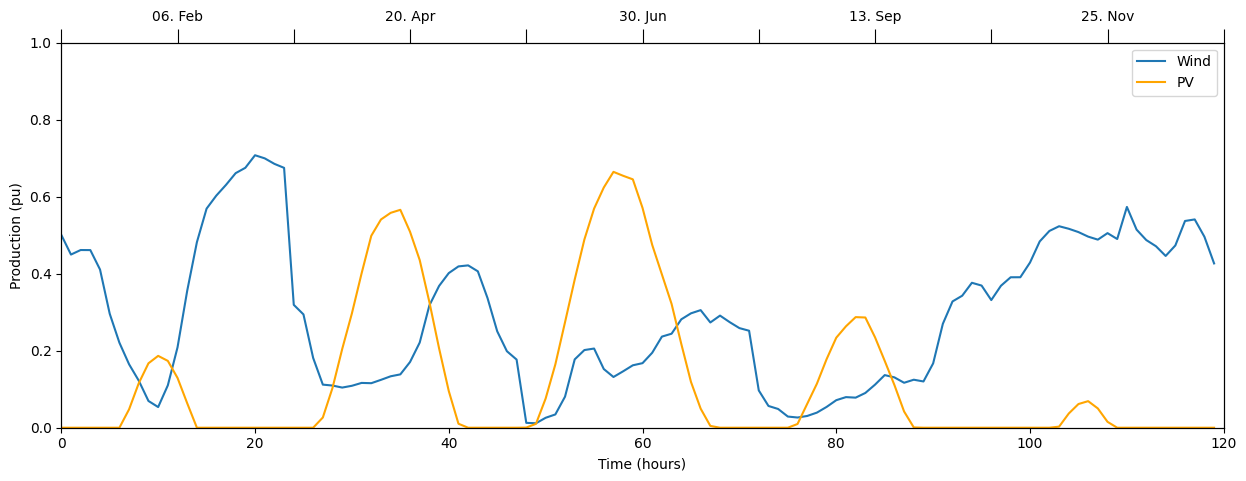

In [ ]:
# Plot OpCap for Wind Farms and PV Farms in the first 120 hours
fig, ax1 = plt.subplots(figsize=(15, 5))

# Primary x-axis
ax1.plot(Train_Robust.res.Generation[:120, 7], label='Wind')
ax1.plot(Train_Robust.res.Generation[:120, 9], label='PV', color='orange')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Production (pu)')
ax1.set_ylim(0, 1)
ax1.set_xlim(0, 120)
ax1.legend()

# Secondary x-axis
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([0,12,24,36,48, 60,72, 84,96, 108,120], minor=False)
ax2.tick_params(axis='x', which='both', length=6)  # Set default tick length
ax2.tick_params(axis='x', which='major', length=10)  # Set major tick length
ax2.set_xticklabels(['','06. Feb','','20. Apr','','30. Jun','','13. Sep','','25. Nov',''])

# Make every second tickmark larger, starting with the first one
for i, tick in enumerate(ax2.get_xticklabels()):
    if i % 2 == 0:
        tick.set_fontsize(12)
        tick.set_fontweight('bold')

plt.show()


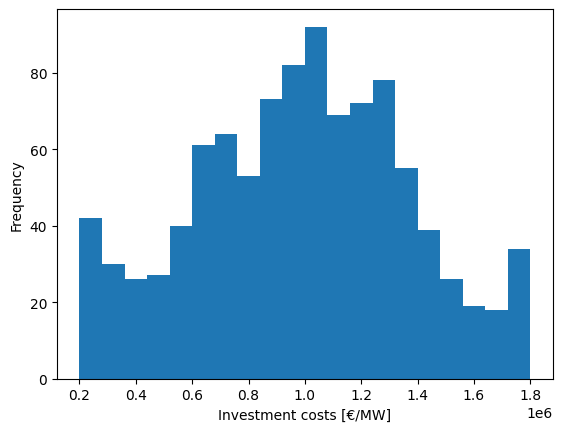

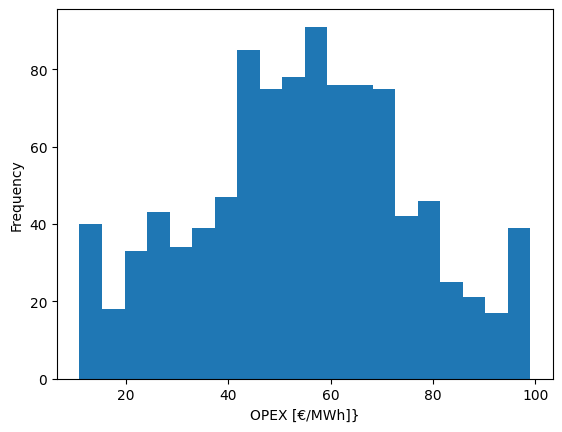

In [ ]:
#print the fith row of Gen_N_Data_scenarios_train
#print(DataObj.Gen_N_Data_scenarios_train[5,:])

#create histogram of the DataObj.Gen_N_Data_scenarios_train[5,:]
plt.hist(DataObj.Gen_N_Data_scenarios_train[5,:], bins=20,)
#plt.title('Histogram of the investment costs for the wind generators')
plt.xlabel('Investment costs [€/MW]')
plt.ylabel('Frequency')
plt.show()


#create histogram of the DataObj.Gen_N_Data_scenarios_train[5,:]
plt.hist(DataObj.Gen_N_OpCost_scenarios_train[4,:], bins=20)
#plt.title('Histogram of the OPEX costs for coal power plant')
plt.xlabel('OPEX [€/MWh]}')
plt.ylabel('Frequency')
plt.show()


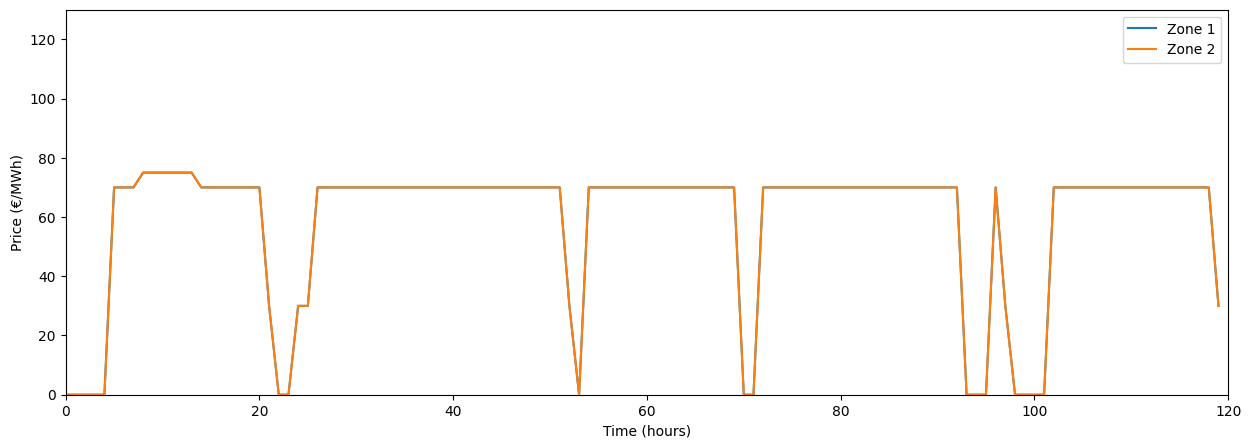

Average Price in Zone 1: 58.333333333333336
Average Price in Zone 2: 58.333333333333336
Standard Deviation of the Price in Zone 1: 25.39050750080548
Standard Deviation of the Price in Zone 2: 25.39050750080548
5th percentile of the Price in Zone 1: -0.0
5th percentile of the Price in Zone 2: -0.0
95th percentile of the Price in Zone 1: 70.24999999999999
95th percentile of the Price in Zone 2: 70.24999999999999


In [6]:
#Drop all columns apart from Price Zone 1 and 2
ZonalPrices = MarketClearing1.res.df[['Price Zone 0','Price Zone 1']].head(120)

#Plot the zonal prices
plt.figure(figsize=(15, 5))
plt.plot(ZonalPrices)
#plt.title('Zonal Prices in Zone 1 and 2 over the first timeaggregrated year (i.e. 120 hours)')
plt.xlabel('Time (hours)')
plt.ylabel('Price (€/MWh)')
plt.legend(['Zone 1', 'Zone 2'])
plt.xlim(0, 120)
plt.ylim(0, 130)
plt.show()


#Print the average Price in Zone 1 and 2
print('Average Price in Zone 1:', ZonalPrices['Price Zone 0'].mean())
print('Average Price in Zone 2:', ZonalPrices['Price Zone 1'].mean())

#Print the standard deviation of the prices in Zone 1 and 2
print('Standard Deviation of the Price in Zone 1:', ZonalPrices['Price Zone 0'].std())
print('Standard Deviation of the Price in Zone 2:', ZonalPrices['Price Zone 1'].std())

#Print the 5th and 95th percentile of the prices in Zone 1 and 2
print('5th percentile of the Price in Zone 1:', ZonalPrices['Price Zone 0'].quantile(0.05))
print('5th percentile of the Price in Zone 2:', ZonalPrices['Price Zone 1'].quantile(0.05))
print('95th percentile of the Price in Zone 1:', ZonalPrices['Price Zone 0'].quantile(0.95))
print('95th percentile of the Price in Zone 2:', ZonalPrices['Price Zone 1'].quantile(0.95))    


# Displaying the relevant results for each model

## Deterministic

In [19]:
#Displaying the invested capacity  
Train_Deterministic.res.df

,Technology,Invested Capacity (MW)
0,Coal,304.5
1,Coal,0.0
2,Coal,0.0
3,Gas,0.0
4,Coal,0.0
5,Wind,340.0
6,Wind,400.0
7,PV,114.3
8,Gas,0.0
9,Coal,0.0


In [20]:
#Display the remaining budget
Train_Deterministic.res.rem_budget

np.float64(1411384712.6842172)

In [21]:
#Display the objective values
Train_Deterministic.res.objective_values

[np.float64(21.208271772282448)]

## Robust

In [ ]:
#Displaying the invested capacity 
Train_Robust.res.df


,Technology,Invested Capacity (MW)
0,Coal,0.000000
1,Coal,0.000000
2,Coal,400.000000
3,Gas,400.000000
4,Coal,0.000000
5,Wind,400.000000
6,Wind,400.000000
7,PV,400.000000
8,Gas,0.000000
9,Coal,0.000000


In [ ]:
#Display the remaining budget
Train_Robust.res.rem_budget

np.float64(808968969.3418698)

In [ ]:
#Display expected profit
np.mean(Train_Robust.res.objective_values)

np.float64(33.383473807853484)

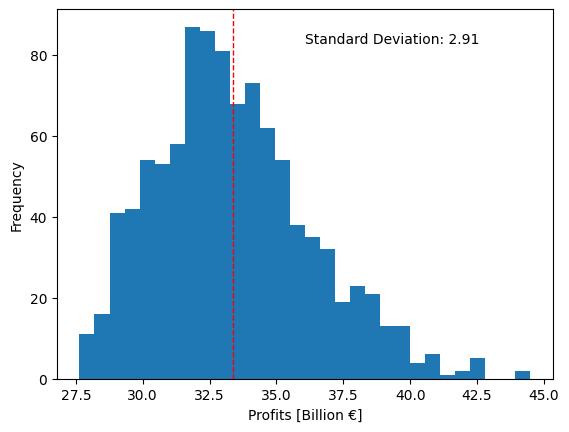

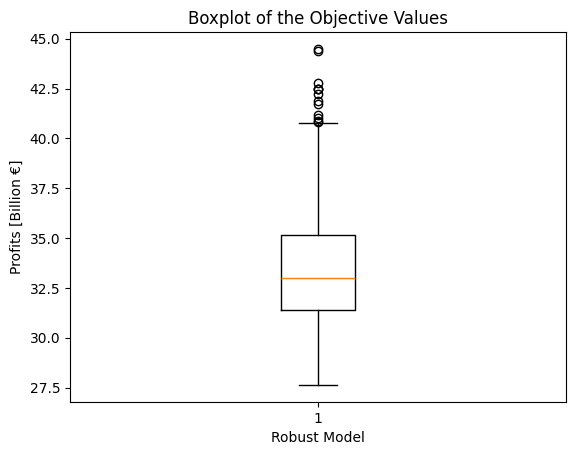

In [ ]:
#Create a histogram of the objective values
plt.hist(Train_Robust.res.objective_values, bins=30)
plt.axvline(np.mean(Train_Robust.res.objective_values), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Profits [Billion €]')
plt.ylabel('Frequency')
#plt.title('Histogram of the Objective Values')
plt.text(0.5, 0.9, f'Standard Deviation: {Train_Robust.res.standard_deviation.round(2)}', horizontalalignment='left', verticalalignment='bottom', transform=plt.gca().transAxes)
plt.show()

# Create a boxplot of the objective values
plt.boxplot(Train_Robust.res.objective_values)
plt.ylabel('Profits [Billion €]')
plt.xlabel('Robust Model')
plt.title('Boxplot of the Objective Values')
plt.show()

## Chance Constraint

In [ ]:
#Displaying the invested capacity 
Train_Chance.res.df

,Technology,Invested Capacity (MW)
0,Coal,400.000000
1,Coal,0.000000
2,Coal,400.000000
3,Gas,400.000000
4,Coal,90.144691
5,Wind,400.000000
6,Wind,400.000000
7,PV,400.000000
8,Gas,0.000000
9,Coal,0.000000


In [ ]:
#Display the remaining budget
Train_Chance.res.rem_budget

217779623.6029172

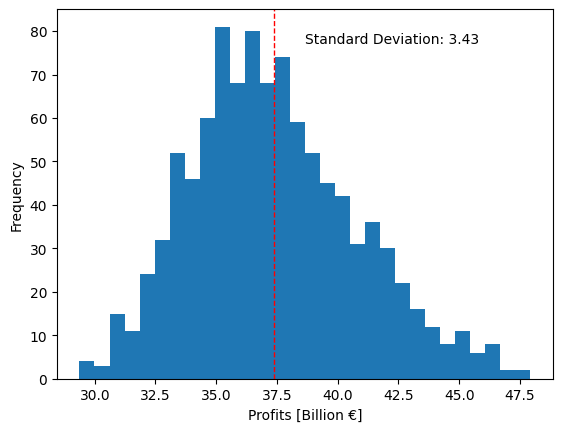

In [ ]:
#Create a histogram of the objective values
plt.hist(Train_Chance.res.objective_values, bins=30)
plt.axvline(np.mean(Train_Chance.res.objective_values), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Profits [Billion €]')
plt.ylabel('Frequency')
#plt.title('Histogram of the Objective Values')
plt.text(0.5, 0.9, f'Standard Deviation: {Train_Chance.res.standard_deviation.round(2)}', horizontalalignment='left', verticalalignment='bottom', transform=plt.gca().transAxes)

plt.show()

## CVaR

In [ ]:
#Displaying the invested capacity 
Train_CVaR.res.df

,Technology,Invested Capacity (MW)
0,Coal,54.650393
1,Coal,36.702500
2,Coal,58.289700
3,Gas,133.747074
4,Coal,36.397450
5,Wind,400.000000
6,Wind,400.000000
7,PV,400.000000
8,Gas,0.000000
9,Coal,0.000000


In [ ]:
#Display the remaining budget
Train_CVaR.res.rem_budget

np.float64(808968969.3418698)

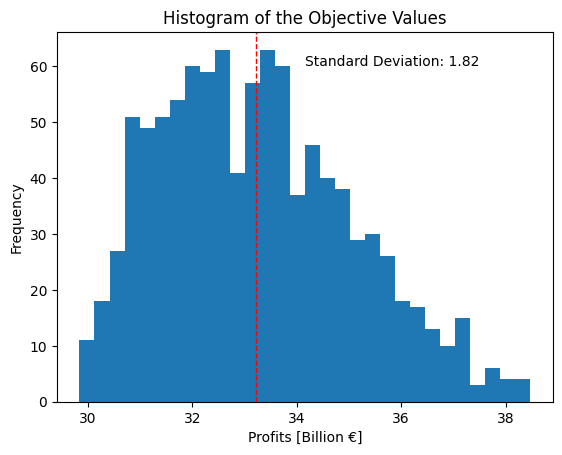

In [ ]:
#Create a histogram of the objective values
plt.hist(Train_CVaR.res.objective_values, bins=30)
plt.axvline(np.mean(Train_CVaR.res.objective_values), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Profits [Billion €]')
plt.ylabel('Frequency')
plt.title('Histogram of the Objective Values')
plt.text(0.5, 0.9, f'Standard Deviation: {Train_CVaR.res.standard_deviation.round(2)}', horizontalalignment='left', verticalalignment='bottom', transform=plt.gca().transAxes)
plt.show()

In [ ]:
# Loop over Beta and run the model
Beta_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
Results_CVaR = []
Results_Expected_rev = []
for beta in Beta_values:
    Train_CVaR_Beta = Test_and_Train_model(ParametersObj, DataObj, MarketClearing1.res.DA_price, Mode='CVaR', Beta=beta, Alpha=0.95)
    Results_CVaR.append(Train_CVaR_Beta.res.CVaR)
    Results_Expected_rev.append(Train_CVaR_Beta.res.Expected_Result)

Set parameter Presolve to value 2
Set parameter Threads to value 4
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 4 threads

Optimize a model with 1922256 rows, 1921017 columns and 5628256 nonzeros
Model fingerprint: 0x5d1f17ee
Coefficient statistics:
  Matrix range     [4e-04, 2e+06]
  Objective range  [4e-05, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 1922103 rows and 1921001 columns
Presolve time: 3.02s
Presolved: 153 rows, 16 columns, 2448 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8931600e+11   3.377476e+08   0.000000e+00      3s
Extra simplex iterations after uncrush: 1
       7    3.257531

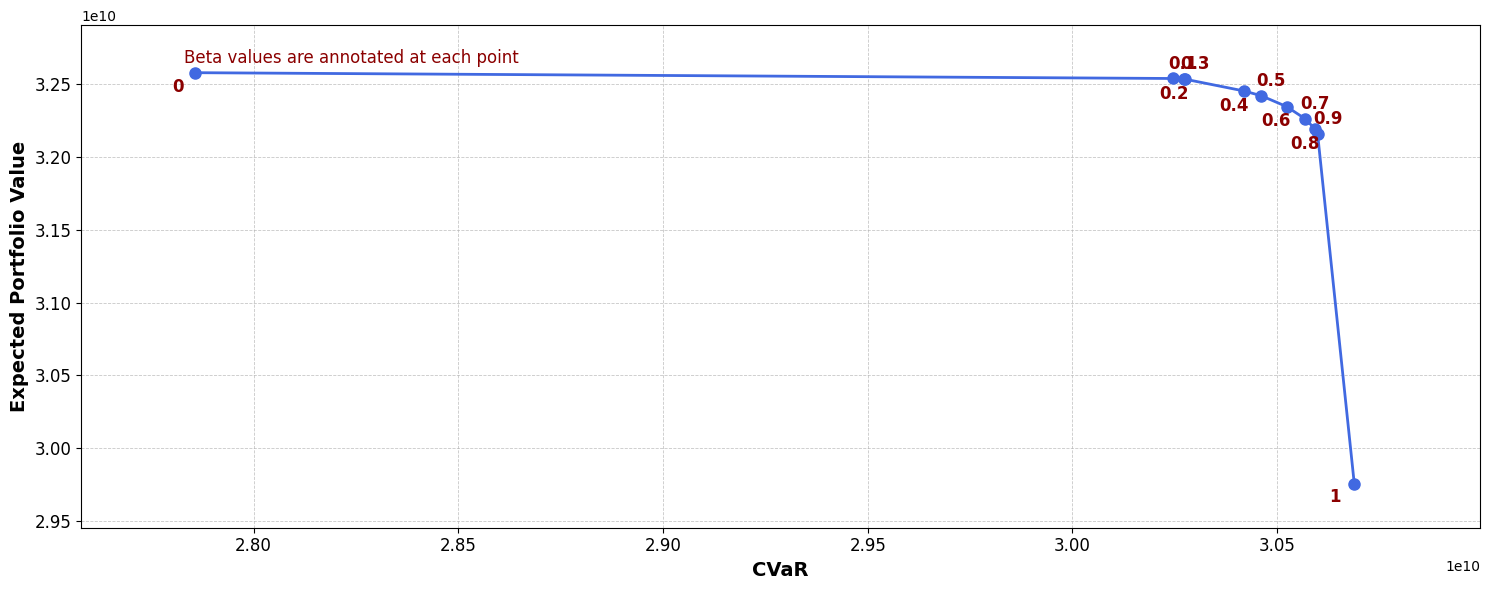

In [ ]:
## PLOT THE RESULTS
plt.figure(figsize=(15, 6))  # Normal-sized dimensions

# Plot with consistent scaling for both axes
plt.plot(
    Results_CVaR, Results_Expected_rev, 
    marker='o', color='royalblue', linestyle='-', linewidth=2, markersize=8, label='Data Points'
)

# Set axis labels and title with professional formatting
plt.xlabel('CVaR', fontsize=14, fontweight='bold')
plt.ylabel('Expected Portfolio Value', fontsize=14, fontweight='bold')
#plt.title('Expected Portfolio Value vs. CVaR', fontsize=14, fontweight='bold')

#Set the tick marks to font size 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)	

# Annotate each point with its beta value
for i, beta in enumerate(Beta_values):
    if i % 2 == 0:
        plt.text(
            Results_CVaR[i] - (0.002*Results_CVaR[i]), Results_Expected_rev[i] - (0.005 * Results_Expected_rev[i]), 
            f'{beta}', fontsize=12, color='darkred', fontweight='bold',
            ha='left', va='bottom', bbox=dict(facecolor='none', edgecolor='none', alpha=0.8)
        )
    else:
        plt.text(
            Results_CVaR[i] + (0.002*Results_CVaR[i]), Results_Expected_rev[i] + (0.005 * Results_Expected_rev[i]), 
            f'{beta}', fontsize=12, color='darkred', fontweight='bold',
            ha='right', va='top', bbox=dict(facecolor='none', edgecolor='none', alpha=0.8)
        )

# Gridlines for clarity
plt.grid(visible=True, linestyle='--', linewidth=0.6, alpha=0.7)

# Adjusting axis limits for balanced visual spacing
plt.xlim(min(Results_CVaR) * 0.99, max(Results_CVaR) * 1.01)
plt.ylim(min(Results_Expected_rev) * 0.99, max(Results_Expected_rev) * 1.01)

# Add legend as a caption-like explanation
plt.text(
    min(Results_CVaR)* 0.999, max(Results_Expected_rev) * 1.002, 
    'Beta values are annotated at each point', fontsize=12, color='darkred'
)

# Tight layout to ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()




# Comparing Results from all models

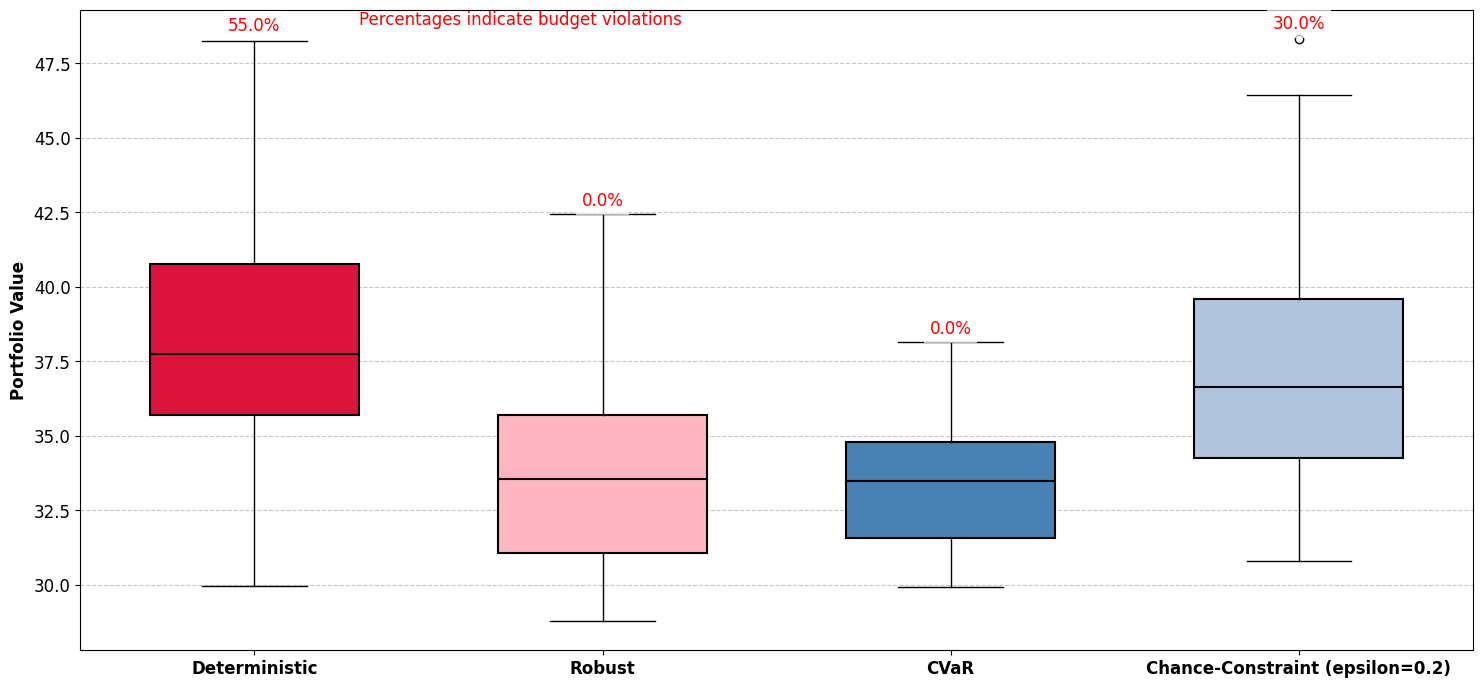

In [ ]:
## PLOT THE RESULTS

# Data
objective_values = [
    #Train_Deterministic.res.objective_values, 
    Test_Deterministic.res.objective_values,
    #Train_Robust.res.objective_values, 
    Test_Robust.res.objective_values, 
    #Train_CVaR.res.objective_values, 
    Test_CVaR.res.objective_values,
    #Train_Chance.res.objective_values, 
    Test_Chance.res.objective_values, 
    
]
labels = [
    #'Train Deterministic', 
    'Deterministic',
    #'Train Robust', 
    'Robust', 
    #'Train CVaR', 
    'CVaR',
    #'Train Chance', 
    'Chance-Constraint (epsilon=0.2)', 
    
    
]
violated_percentages = [
    #np.mean(Train_Deterministic.res.violated_budget) * 100, 
    np.mean(Test_Deterministic.res.violated_budget) * 100,
    #np.mean(Train_Robust.res.violated_budget) * 100, 
    np.mean(Test_Robust.res.violated_budget) * 100,
     #np.mean(Train_CVaR.res.violated_budget) * 100, 
    np.mean(Test_CVaR.res.violated_budget) * 100,
    #np.mean(Train_Chance.res.violated_budget) * 100, 
    np.mean(Test_Chance.res.violated_budget) * 100,
   
    
]

# Define color palette
colors_light = ['#FFB6C1', '#B0C4DE', '#E6E6FA', '#F0E68C']
colors_dark = ['#DC143C', '#4682B4', '#9370DB', '#FFD700']

# Plot
plt.figure(figsize=(15, 7))
for i, (values, label, violated_pct) in enumerate(zip(objective_values, labels, violated_percentages), start=1):
    color = colors_dark[(i-1)//2] if i % 2 == 1 else colors_light[(i-1)//2]
    plt.boxplot(values, positions=[i], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color, color='black', linewidth=1.5), medianprops=dict(color='black', linewidth=1.5))
    plt.text( i, max(values) * 1.007, f'{violated_pct:.1f}%', ha='center', fontsize=12, color='red', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Axis labels and title
plt.xticks(range(1, len(labels) + 1), labels, rotation=15, fontsize=13, fontweight='bold')
plt.ylabel('Portfolio Value', fontsize=12, fontweight='bold')

#Set tick marks to font size 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Make labels straight
plt.xticks(rotation=0)

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend
plt.text(
    1.3, max(max(values) for values in objective_values) * 1.01, 
    'Percentages indicate budget violations', fontsize=12, color='red', ha='left'
)

# Tight layout and display
plt.tight_layout()
plt.show()


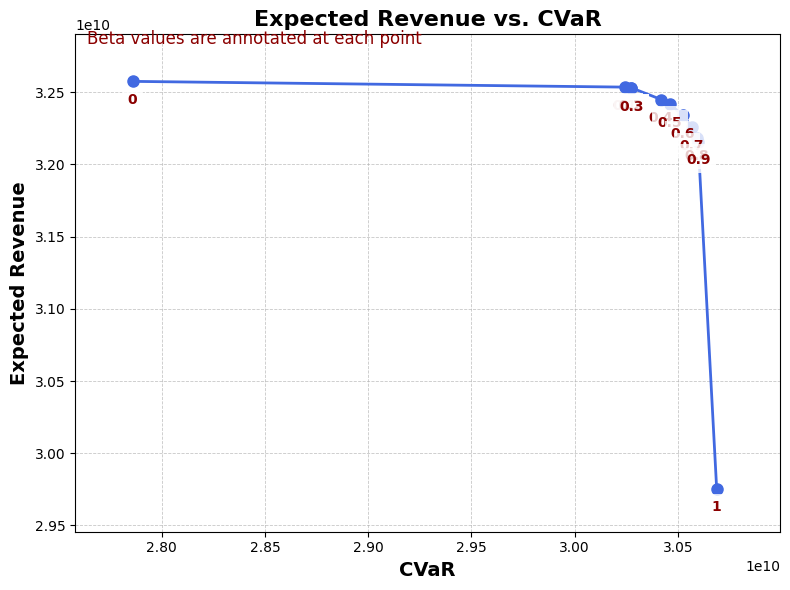

In [ ]:
## PLOT THE RESULTS
plt.figure(figsize=(8, 6))  # Normal-sized dimensions

# Plot with consistent scaling for both axes
plt.plot(
    Results_CVaR, Results_Expected_rev, 
    marker='o', color='royalblue', linestyle='-', linewidth=2, markersize=8, label='Data Points'
)

# Set axis labels and title with professional formatting
plt.xlabel('CVaR', fontsize=14, fontweight='bold')
plt.ylabel('Expected Revenue', fontsize=14, fontweight='bold')
plt.title('Expected Revenue vs. CVaR', fontsize=16, fontweight='bold')

# Annotate each point with its beta value
for i, beta in enumerate(Beta_values):
    plt.text(
        Results_CVaR[i], Results_Expected_rev[i] - (0.0025 * Results_Expected_rev[i]), 
        f'{beta}', fontsize=10, color='darkred', fontweight='bold',
        ha='center', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )

# Gridlines for clarity
plt.grid(visible=True, linestyle='--', linewidth=0.6, alpha=0.7)

# Adjusting axis limits for balanced visual spacing
plt.xlim(min(Results_CVaR) * 0.99, max(Results_CVaR) * 1.01)
plt.ylim(min(Results_Expected_rev) * 0.99, max(Results_Expected_rev) * 1.01)

# Add legend as a caption-like explanation
plt.text(
    min(Results_CVaR)* 0.992, max(Results_Expected_rev) * 1.008, 
    'Beta values are annotated at each point', fontsize=12, color='darkred'
)

# Tight layout to ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()




# Model 2: Integrated Bi-level optimization of dispatch problem and investment problem using KKTs

In [ ]:
 ## CREATE THE PARAMETERS AND DATA OBJECTS
a=100
ParametersObj_SHORT = Parameters(H, D, Y, a, N_dem, N_gen_E, N_gen_N, N_zone, N_line, B, R, N_S, N_S_test, max_deviation)
DataObj_SHORT = InputData(Dem[0:a,:], Uti, Load_Z, Gen_E_OpCost, Gen_N_OpCost, Gen_N_MaxInvCap, Gen_E_Cap, Gen_N_InvCost * (a/N), Gen_E_Tech, Gen_N_Tech, Gen_E_Z, Gen_N_Z, Gen_E_OpCap[0:a,:], Gen_N_OpCap[0:a,:], Trans_React, Trans_Cap, Trans_Line_From_Z, Trans_Line_To_Z, Trans_Z_Connected_To_Z,Gen_N_Data_scenarios,Gen_N_OpCost_scenarios, Gen_N_Data_scenarios_train, Gen_N_OpCost_scenarios_train, Gen_N_Data_scenarios_test, Gen_N_OpCost_scenarios_test)
ParametersObj_SHORT.Sum_over_hours = np.ones((a,1))

In [ ]:
class Model_2_no_zone():
    def __init__(self, ParametersObj, DataObj, Model_results = 1, Guroby_results = 1):
        self.P = ParametersObj # Parameters
        self.D = DataObj # Data
        self.Model_results = Model_results
        self.Guroby_results = Guroby_results
        self.var = Expando()  # Variables
        self.con = Expando()  # Constraints
        self.res = Expando()  # Results
        self._build_model() 

        
        


    def _build_variables(self):
        self.var.P_N = self.m.addMVar((self.P.N_gen_N, 1), lb=0) # Invested capacity in every new generator
        self.var.d = self.m.addMVar((self.P.N, self.P.N_dem), lb=0)  # demand per hour for every load
        self.var.p_E = self.m.addMVar((self.P.N, self.P.N_gen_E), lb=0)  # power output per hour for every existing generator
        self.var.p_N = self.m.addMVar((self.P.N, self.P.N_gen_N), lb=0) # Power output per hour for every new generator
        
        # Dual variables
        self.var.DA_Price = self.m.addMVar((self.P.N, 1), lb=-GRB.INFINITY)  # Day ahead price per hour
        self.var.mu_E_up = self.m.addMVar((self.P.N, self.P.N_gen_E), lb=0)  # Dual 1
        self.var.mu_E_down = self.m.addMVar((self.P.N, self.P.N_gen_E), lb=0)  # Dual 1
        self.var.mu_N_up = self.m.addMVar((self.P.N, self.P.N_gen_N), lb=0)  # Dual 2
        self.var.mu_N_down = self.m.addMVar((self.P.N, self.P.N_gen_N), lb=0)  # Dual 2
        self.var.nu_up = self.m.addMVar((self.P.N, self.P.N_dem), lb=0)  # Dual 3
        self.var.nu_down = self.m.addMVar((self.P.N, self.P.N_dem), lb=0)  # Dual 3
        
        

    def _build_constraints(self):
        # Capacity investment constraint
        self.con.cap_inv = self.m.addConstr(self.var.P_N <= self.D.Gen_N_MaxInvCap, name='Maximum capacity investment')

        # Budget constraint
        self.con.budget = self.m.addConstr(self.var.P_N.T @ self.D.Gen_N_InvCost <= self.P.B, name='Budget constraint')

        ## PRIMAL CONSTRAINTS
        # Max production constraint existing
        self.con.max_p_E = self.m.addConstr(self.var.p_E <= self.D.Gen_E_OpCap * (self.P.Sum_over_hours @ self.D.Gen_E_Cap.T), name='Maximum production of existing generators')

        # Max production constraint new, in a different shape because we can't transpose varaibles
        self.con.max_p_N = self.m.addConstrs(self.var.p_N[h, g] <= (self.D.Gen_N_OpCap[h, g] *  self.var.P_N[g].T) for h in range(self.P.N) for g in range(self.P.N_gen_N))

        # Max demand constraint
        self.con.max_dem = self.m.addConstr(self.var.d <= self.D.Dem, name='Maximum demand')        

        # Balance constraint
        prod_E = self.var.p_E @ self.P.Sum_over_gen_E  
        prod_N = self.var.p_N @ self.P.Sum_over_gen_N  
        dem = self.var.d @ self.P.Sum_over_dem
        self.con.balance = self.m.addConstr(dem == prod_E + prod_N, name='Power balance') 

        # ## FIRST ORDER CONDITIONS

        self.con.L_p_EC = self.m.addConstr(self.P.Sum_over_hours @ self.D.Gen_E_OpCost.T + (self.var.DA_Price @ self.P.Sum_over_gen_E.T)/self.P.N_gen_E - self.var.mu_E_down + self.var.mu_E_up == 0, name='L_p_EC')
        self.con.L_p_NC = self.m.addConstr(self.P.Sum_over_hours @ self.D.Gen_N_OpCost.T + (self.var.DA_Price @ self.P.Sum_over_gen_N.T)/self.P.N_gen_N - self.var.mu_N_down + self.var.mu_N_up == 0, name='L_p_NC')
        self.con.L_d = self.m.addConstr(- self.P.Sum_over_hours @ self.D.Uti.T - (self.var.DA_Price @ self.P.Sum_over_dem.T)/self.P.N_dem - self.var.nu_down + self.var.nu_up == 0, name='L_d')
        

        # ## COMPLMEENTARY CONDITIONS

        # # Define the Big M matrixes

        Big_M_p = np.full((self.P.N, self.P.N_gen_E), 1e9)  # Big M for the production constraints
        Big_M_d = np.full((self.P.N, self.P.N_dem), 1e9)  # Big M for the demand constraints

        # # Define the binary variables

        b_E_down = self.m.addVars(self.P.N, self.P.N_gen_E, vtype=gp.GRB.BINARY, name="b_E_down")
        b_E_up = self.m.addVars(self.P.N, self.P.N_gen_E, vtype=gp.GRB.BINARY, name="b_E_up")

        b_N_down = self.m.addVars(self.P.N, self.P.N_gen_N, vtype=gp.GRB.BINARY, name="b_N_down")
        b_N_up = self.m.addVars(self.P.N, self.P.N_gen_N, vtype=gp.GRB.BINARY, name="b_N_up")

        b_d_down = self.m.addVars(self.P.N, self.P.N_dem, vtype=gp.GRB.BINARY, name="b_d_down")
        b_d_up = self.m.addVars(self.P.N, self.P.N_dem, vtype=gp.GRB.BINARY, name="b_d_up")

        # Define the complementary constraints
        # Existing generators
        self.con.compl_E_down_mu = self.m.addConstrs((self.var.mu_E_down[h, g] <= Big_M_p[h, g] * b_E_down[h, g] for h in range(self.P.N) for g in range(self.P.N_gen_E)), name='compl_E_down_mu')
        self.con.compl_E_down_p = self.m.addConstrs((self.var.p_E[h, g] <= Big_M_p[h, g] * (1 - b_E_down[h, g]) for h in range(self.P.N) for g in range(self.P.N_gen_E)), name='compl_E_down_p')
        self.con.compl_E_up_mu = self.m.addConstrs((self.var.mu_E_up[h, g] <= Big_M_p[h, g] * b_E_up[h, g] for h in range(self.P.N) for g in range(self.P.N_gen_E)), name='compl_E_up_mu')
        self.con.compl_E_up_p = self.m.addConstrs(((self.D.Gen_E_OpCap[h, g] * Gen_E_Cap[g,0] - self.var.p_E[h, g]) <= Big_M_p[h, g] * (1 - b_E_up[h, g]) for h in range(self.P.N) for g in range(self.P.N_gen_E)), name='compl_E_up_p')

        # New generators
        self.con.compl_N_down_mu = self.m.addConstrs((self.var.mu_N_down[h, g] <= Big_M_p[h, g] * b_N_down[h, g] for h in range(self.P.N) for g in range(self.P.N_gen_N)), name='compl_N_down_mu')
        self.con.compl_N_down_p = self.m.addConstrs((self.var.p_N[h, g] <= Big_M_p[h, g] * (1 - b_N_down[h, g]) for h in range(self.P.N) for g in range(self.P.N_gen_N)), name='compl_N_down_p')
        self.con.compl_N_up_mu = self.m.addConstrs((self.var.mu_N_up[h, g] <= Big_M_p[h, g] * b_N_up[h, g] for h in range(self.P.N) for g in range(self.P.N_gen_N)), name='compl_N_up_mu')
        self.con.compl_N_up_p = self.m.addConstrs(((self.D.Gen_N_OpCap[h, g] *  self.var.P_N[g].T - self.var.p_N[h, g]) <= Big_M_p[h, g] * (1 - b_N_up[h, g]) for h in range(self.P.N) for g in range(self.P.N_gen_N)), name='compl_N_up_p')

        # Demand
        self.con.compl_d_down_mu = self.m.addConstrs((self.var.nu_down[h, d] <= Big_M_d[h, d] * b_d_down[h, d] for h in range(self.P.N) for d in range(self.P.N_dem)), name='compl_d_down_mu')
        self.con.compl_d_down_p = self.m.addConstrs((self.var.d[h, d] <= Big_M_d[h, d] * (1 - b_d_down[h, d]) for h in range(self.P.N) for d in range(self.P.N_dem)), name='compl_d_down_p')
        self.con.compl_d_up_mu = self.m.addConstrs((self.var.nu_up[h, d] <= Big_M_d[h, d] * b_d_up[h, d] for h in range(self.P.N) for d in range(self.P.N_dem)), name='compl_d_up_mu')
        self.con.compl_d_up_p = self.m.addConstrs(((self.D.Dem[h, d] - self.var.d[h, d]) <= Big_M_d[h, d] * (1 - b_d_up[h, d]) for h in range(self.P.N) for d in range(self.P.N_dem)), name='compl_d_up_p')


    # def _build_objective(self): # without linearisation
    #     self.revenues = (self.var.p_N * (self.var.DA_Price @ self.P.Sum_over_gen_N.T)).sum()  # don't use quicksum here because it's a <MLinExpr (3600, N_zone)>
    #     self.op_costs = gp.quicksum(self.var.p_N @ self.D.Gen_N_OpCost)
    #     self.invest_costs = self.var.P_N.T @ self.D.Gen_N_InvCost
    #     objective = self.P.R*(self.revenues - self.op_costs) - self.invest_costs
    #     self.m.setObjective(objective, GRB.MAXIMIZE)

    def _build_objective(self): # with linearisation

        # 1. Costs related to existing generators (G_EC)
        cost_EC_p = (self.var.p_E @ self.D.Gen_E_OpCost).sum()
        cost_EC_mu = ((self.D.Gen_E_OpCap * (self.P.Sum_over_hours @ Gen_E_Cap.T)) * self.var.mu_E_up).sum()

        # 2. Benefits and costs related to demand (D)
        benefit_d = (self.var.d @ self.D.Uti).sum()
        cost_nu_d = (self.D.Dem * self.var.nu_up).sum()

        # 3. Costs related to new generators (G_NC)
        cost_NC_p = (self.var.p_N @ self.D.Gen_N_OpCost).sum()
        cost_NC_P = (self.var.P_N.T @ self.D.Gen_N_InvCost).sum()

        # Full objective function
        objective = self.P.R * (- cost_EC_p - cost_EC_mu  # Existing generators
            + benefit_d - cost_nu_d   # Demand
            - cost_NC_p) - cost_NC_P
        
        self.m.setObjective(objective, gp.GRB.MAXIMIZE)

        


    def _display_guropby_results(self):
        self.m.setParam('OutputFlag', self.Guroby_results)
        #self.m.setParam('Method', 2)  # Use barrier method
        #self.m.setParam('Crossover', 0)  # Skip crossover for speed
        #self.m.setParam('Heuristics', 0.2)  # Enable aggressive heuristics
        #self.m.setParam('MIPFocus', 1)  # Focus on finding feasible solutions
    

    def _build_model(self):
        self.m = gp.Model('Model 2')
        self._build_variables()  
        self._build_constraints()
        self._build_objective()
        self._display_guropby_results()
        self.m.optimize()
        if self.Model_results == 1:
            self._extract_results()

    def _extract_results(self):
        # Display the objective value
        print('Objective value: ', self.m.objVal)
        
        # Display the generators the model invested in, in a dataframe
        self.res.P_N = np.round(self.var.P_N.X, 2)
        self.res.P_N = self.res.P_N.reshape((self.P.N_gen_N,1))
        self.res.df = pd.DataFrame(self.D.Gen_N_Tech, columns = ['Technology'])
        self.res.df['Invested capacity (MW)'] = self.res.P_N
        remaining_budget = self.P.B - (self.var.P_N.T.X @ self.D.Gen_N_InvCost).sum()

        # 1. Costs related to existing generators (G_EC)
        cost_EC_p = (self.var.p_E.X @ self.D.Gen_E_OpCost).sum()
        cost_EC_mu = ((self.D.Gen_E_OpCap * (self.P.Sum_over_hours @ Gen_E_Cap.T)) * self.var.mu_E_up.X).sum()
        

        # 2. Benefits and costs related to demand (D)
        benefit_d = (self.var.d.X @ self.D.Uti).sum()
        cost_nu_d = (self.D.Dem * self.var.nu_up.X).sum()

        # 3. Costs related to new generators (G_NC)
        cost_NC_p = (self.var.p_N.X @ self.D.Gen_N_OpCost).sum()
        cost_NC_P = (self.var.P_N.T.X @ self.D.Gen_N_InvCost).sum()

        # Full objective function
        objective = self.P.R * (- cost_EC_p - cost_EC_mu  # Existing generators
            + benefit_d - cost_nu_d   # Demand
            - cost_NC_p) - cost_NC_P


        objective_val = (objective + remaining_budget)/1000000000
        self.res.objective_values = objective_val
        self.res.remaining_budget = remaining_budget
        
            

        

In [ ]:
Model2NZ_short = Model_2_no_zone(ParametersObj_SHORT, DataObj_SHORT)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 5 5500U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 29517 rows, 24616 columns and 66752 nonzeros
Model fingerprint: 0xd9a4cebd
Variable types: 14816 continuous, 9800 integer (9800 binary)
Coefficient statistics:
  Matrix range     [4e-04, 1e+09]
  Objective range  [3e+01, 9e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e-01, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 21463 rows and 17058 columns
Presolve time: 0.63s
Presolved: 8054 rows, 7558 columns, 20503 nonzeros
Variable types: 4687 continuous, 2871 integer (2867 binary)

Root relaxation: objective 5.035587e+08, 3038 iterations, 0.10 seconds (

KeyboardInterrupt: 

Exception ignored in: 'gurobipy.logcallbackstub'
Traceback (most recent call last):
  File "C:\Users\konst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\iostream.py", line 655, in write
    def write(self, string: str) -> Optional[int]:  # type:ignore[override]

KeyboardInterrupt: 


 37293 28539 3.7517e+08   30 1102 3.4900e+08 3.9627e+08  13.5%  44.4  605s
 37297 28542 3.9194e+08   34 1103 3.4900e+08 3.9627e+08  13.5%  44.4  610s


In [ ]:
Model2NZ_short.res.objective_values

3.277227993191453

In [ ]:
Model2NZ_short.m.objVal

321603616.4932311

In [ ]:
Model2NZ_short.res.df

,Technology,Invested capacity (MW)
0,Coal,141.40
1,Coal,0.00
2,Coal,112.03
3,Gas,0.00
4,Coal,51.10
5,Wind,339.90
6,Wind,400.00
7,PV,114.34
8,Gas,0.00
9,Coal,0.00
